In [1]:
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                columns=iris['feature_names']+['target'])

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
df['species']=pd.Categorical.from_codes(iris.target, iris.target_names)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [8]:
df=df.drop(columns=['target'])

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
X = df.iloc[:100, [0,2]].values

In [11]:
y=df.iloc[:100,4].values

In [12]:
y= np.where (y=='setosa', -1,1)

In [13]:
X_iris,y_iris=X,y

In [14]:
import matplotlib.pyplot as plt

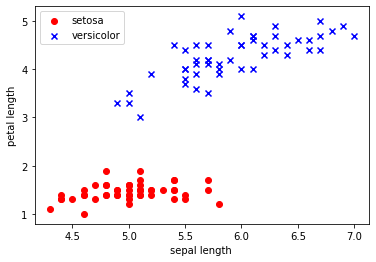

In [15]:
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length ')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [16]:
from perceptron import Perceptron

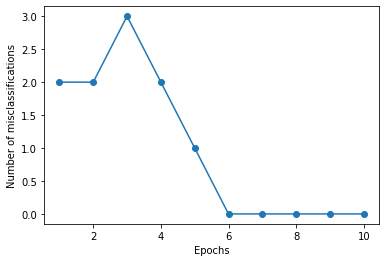

In [17]:
model=Perceptron(eta=0.1, n_iter=10)
model.fit(X,y)
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [18]:
from matplotlib.colors import ListedColormap

In [19]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

 markers = ('s', 'x', 'o', '^', 'v')
 colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
 cmap = ListedColormap(colors[:len(np.unique(y))])
 
 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
 np.arange(x2_min, x2_max, resolution))
 Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
 Z = Z.reshape(xx1.shape)
 
 plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
 plt.xlim(xx1.min(), xx1.max())
 plt.ylim(xx2.min(), xx2.max())

 for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
  alpha=0.8, c=cmap(idx),
  marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


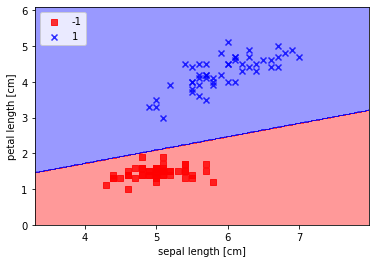

In [20]:
plot_decision_regions(X, y, classifier=model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [21]:
model.errors_

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

In [22]:
model.w_

array([-0.4 , -0.68,  1.82])

In [23]:
model.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [24]:
model.predict(X[2])

array(-1)

In [25]:
model.predict([7.5,5.4])

array(1)

In [26]:
import pickle

In [27]:
with open("model_rta.pkl", "wb") as fh:
    pickle.dump(model, fh)

In [28]:
with open("model_rta.pkl", "rb") as fh:    
    loaded_model = pickle.load(fh)

In [30]:
loaded_model.predict([4.5,2.4])

array(1)